# Statsmodels

### Linear Regression Models

In [1]:
#Para visualização de gráficos
from pylab import *
%matplotlib inline

In [2]:
#Importando os modulos
import numpy as np
import pandas as pd
import statsmodels as st
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.filterwarnings(action = 'ignore', category = FutureWarning)
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
np.random.seed(9876789)

In [3]:
np.__version__

'1.21.3'

In [4]:
pd.__version__

'1.3.4'

In [5]:
st.__version__

'0.12.2'

In [12]:
#Criando dados artificiais
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size = nsample)

In [14]:
x = sm.add_constant(X)
y = np.dot(x, beta) + e

In [15]:
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.000e+06
Date:                Wed, 23 Feb 2022   Prob (F-statistic):          7.20e-244
Time:                        13:38:02   Log-Likelihood:                -135.63
No. Observations:                 100   AIC:                             277.3
Df Residuals:                      97   BIC:                             285.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0897      0.280      3.885      0.0

In [16]:
print('Parameters: ', results.params)
print('R2', results.rsquared)

Parameters:  [ 1.08966139  0.06373247 10.00293808]
R2 0.9999903004590601


In [20]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x - 5) **2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5,]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size = nsample)

res = sm.OLS(y, x).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              376.0
Date:                Wed, 23 Feb 2022   Prob (F-statistic):                    1.24e-24
Time:                        13:39:40   Log-Likelihood:                         -127.08
No. Observations:                  50   AIC:                                      256.2
Df Residuals:                      49   BIC:                                      258.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [21]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [0.73351854]
Standard errors:  [0.0378272]
Predicted values:  [ 0.          0.29939532  0.59879064  0.89818597  1.19758129  1.49697661
  1.79637193  2.09576725  2.39516257  2.6945579   2.99395322  3.29334854
  3.59274386  3.89213918  4.1915345   4.49092983  4.79032515  5.08972047
  5.38911579  5.68851111  5.98790644  6.28730176  6.58669708  6.8860924
  7.18548772  7.48488304  7.78427837  8.08367369  8.38306901  8.68246433
  8.98185965  9.28125498  9.5806503   9.88004562 10.17944094 10.47883626
 10.77823158 11.07762691 11.37702223 11.67641755 11.97581287 12.27520819
 12.57460351 12.87399884 13.17339416 13.47278948 13.7721848  14.07158012
 14.37097545 14.67037077]


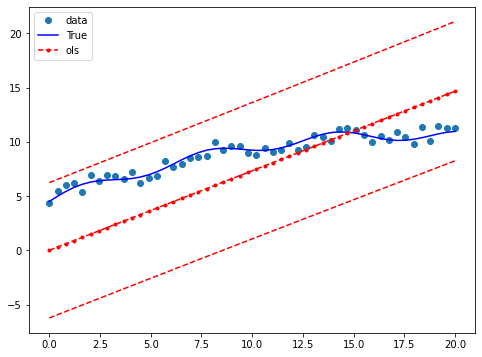

In [23]:
prstd, iv_1, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize = (8, 6))

ax.plot(x, y, 'o', label = "data")
ax.plot(x, y_true, 'b-', label = "True")
ax.plot(x, res.fittedvalues, 'r--.', label = "ols")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_1, 'r--')
ax.legend(loc='best')

### Time-Series Analysis

In [24]:
from statsmodels.tsa.arima_process import arma_generate_sample

In [26]:
#Gerando dados
np.random.seed(12345)
arparms = np.array([.75, -.25])
maparams = np.array([.65, .35])

In [27]:
#Parâmetros
arparms = np.r_[1, -arparms]
maparam = np.r_[1, maparams]
nobs = 250
y = arma_generate_sample(arparms, maparams, nobs)

In [28]:
dates = sm.tsa.datetools.dates_from_range('1980m1', length = nobs)
y = pd.Series(y, index = dates)
arma_mod = sm.tsa.ARMA(y, order = (2,2))
arma_res = arma_mod.fit(trend = 'nc', disp = -1)

/home/lion/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [29]:
print(arma_res.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  250
Model:                     ARMA(2, 2)   Log Likelihood                -245.887
Method:                       css-mle   S.D. of innovations              0.645
Date:                Wed, 23 Feb 2022   AIC                            501.773
Time:                        13:55:18   BIC                            519.381
Sample:                    01-31-1980   HQIC                           508.860
                         - 10-31-2000                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.8411      0.403      2.089      0.037       0.052       1.630
ar.L2.y       -0.2693      0.247     -1.092      0.275      -0.753       0.214
ma.L1.y        0.5352      0.412      1.299      0.1

# Fim